Dans la partie précédente, nous avons vu les rudiments de l'affichage de matplotlib et exploré un tout petit peu les possibilités de seaborn en changeant le thème de notre graphique. Dans cette partie, nous allons voir d'autres types de graphiques.

### Buts du TP 
- Voir et réaliser un diagramme en bâtons
- Voir et réaliser un diagramme circulaire (appelé aussi camembert)
- Voir et réaliser un diagramme nuage de points
- Voir et réaliser un diagramme histogramme

Mais avant, on commence par installer nos bibliothèques, celles indispensables à la réalisation de nos graphiques.

In [2]:
# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# Et on importe toujours pandas et numpy
import pandas as pd
import numpy as np

# Diagramme en bâtons (bar chart)

Le diagramme en bâtons (ou barre) est idéal pour comparer des données. Il permet de montrer la relation entre une donnée numérique et une donnée catégorique. Par exemple, la réparition du temps en fonction des activités. Le diagramme en barres existe sous quatre formes :
- Diagramme en barres (position horizontale)
- Diagramme en colonnes (position verticale)
- Diagramme en barres empilées (position horizontale)
- Diagramme en colonnes empilées (position verticale)

Notez également qu'il est possible de grouper nos barres dépendamment du type de graphique que vous utilisez.

In [3]:
sns.set_style('darkgrid')

liste_matieres = [
    'Mathématiques', 'Français', 
    'Histoire-Géographie', 'Physique Chimie', 
    "EPS", "LV1", 
    "LV2", "Philosophie"
]
liste_notes = [10, 15, 13, None, 15, 12, 17, 8]

bulletin_de_notes_df = pd.DataFrame.from_dict({
    "matières": liste_matieres,
    "notes": liste_notes,
})

## Données manquantes

Dans les précédents TP, nous avons travaillé avec des DataFrame qui avaient, parfois, des données manquantes. Nous avions procédés à la suppression de la ligne (ou colonne) associée. Mais parfois, ce n'est pas ce que nous vous voulons. En enseignants très cléments, nous allons donner une note pour la matière de physique chimie, basée sur la moyenne des autres notes, généreux. Nous sommes d'autant plus obligés car les graphiques n'aiment pas trop les données incorrectes surtout pour les chiffres.

Pour ce faire, nous allons utiliser la méthode `fillna()` (fill non available - value - / remplir les variables non présentes / valides) et lui passer comme paramètre la moyenne des valeurs de la colonne "notes", en utilisant la méthode `.mean()`.
Nous aurions pu être plus généreux en mettant la note max `.max()`, plus sévère en mettant la note min `.min()`, ou au milieu mettant la note médiane `.median()`.

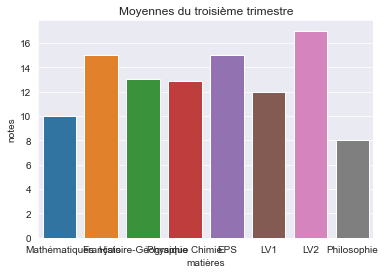

In [3]:
# Le barplot n'aime pas trop les variables manquantes, au lieu de supprimer la matière incriminée
# Nous allons lui attribuer comme note la moyenne des notes autres matières 
bulletin_de_notes_df["notes"].fillna((
    # On arrondi aux deux dernières décimales
    round(
        # On fait la moyenne des valeurs de la colonne "notes"
        bulletin_de_notes_df["notes"].mean(), 
    2)

# On précise inplace=True pour faire muter le DataFrame
), inplace=True)

# Cette fois-ci on va utiliser seaborn
# barplot prend en paramètres : 
# - x = des variables qualitatives (ou catégorielle souvent des chaînes de caractères)
# - y = des variables quantitatives (des nombres en somme)
sns.barplot(x = "matières", y = "notes", data=bulletin_de_notes_df)
plt.title(
    f'Moyennes du troisième trimestre',
)
# La méthode .show(), facultatif dans un notebook, permet d'afficher un graphique 
plt.show()

##### Qu'observez-vous ?

A partir de là, nous avons trois choix :
- Incliner nos labels
- Passer notre graphique en horizontal
- Augmenter la taille du graphique

Essayons-les tous !

### Incliner nos labels

Pour incliner nos labels, nous allons devoir jouer sur la méthode `.xticks()` et lui passer en paramètre le degré de rotation voulu pour nos `xticks`, grâce à la propriété `rotation`. Pour rappel, voici en détails l'anatomie d'un graphique.

![Anatomy graphique matplotlib](_images/anatomy.png)

- [Voir l'anatomie d'un graphique](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

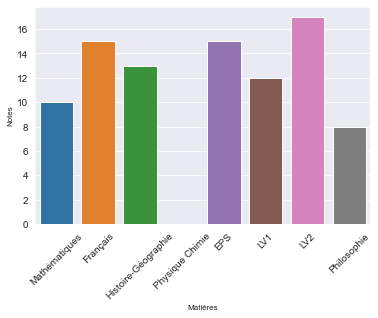

In [5]:
sns.barplot(x = "matières", y = "notes", data=bulletin_de_notes_df)
plt.xticks(rotation=45)
plt.ylabel(
    "Notes", 
    fontsize=8
)
plt.xlabel(
    "Matières", 
    fontsize=8
)
plt.show()

##### Qu'observez-vous ?

### Passer notre graphique en horizontal

Pour rappel, la méthode `barplot()` de seaborn accepte pour paramètres x et y une variable quantitative, et une qualitative respectivement. Ainsi, si on inverse les deux, eh bien, notre graphique sera horizontal. Essayez !

In [5]:
# Reprenez le graphique du dessus (inutile de prendre la partie relative à xticks)
# Remplacez x par y, et y par x

### Augmenter la taille du graphique

Parfois aucune des solutions précédemment énoncées ne fonctionneront et la solution se trouvera dans la taille du graphique. Elle peut être changée via la méthode `.figure()`, cette méthode permet de définir une toile sur laquelle on va afficher nos graphiques. On peut lui définir plein de paramètres mais dans ce cas seul le pramètre `figsize` qui permet de définir la taille en pouces (1 pouce ~= 2.52cm) de notre toile. Il est préférable de la mettre avant la définition du premier graphique.

- [Voir documentation de la méthode figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

Attention, à la taille de votre graphique, si vous mettez une taille trop grande, matplotlib lèvera une erreur et n'affichera pas votre graphique.

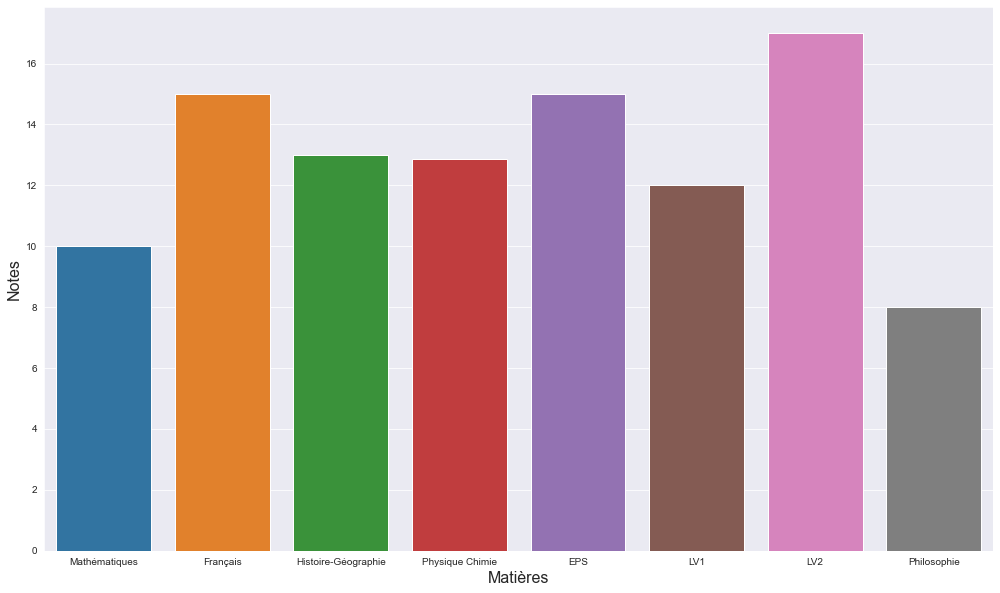

In [5]:
plt.figure(figsize=(17, 10)) # largeur, hauteur en pouces (1 pouce ~= 2.52cm)
sns.barplot(x = "matières", y = "notes", data = bulletin_de_notes_df)
plt.ylabel(
    "Notes", 
    fontsize=16
)
plt.xlabel(
    "Matières", 
    fontsize=16
)
plt.show()

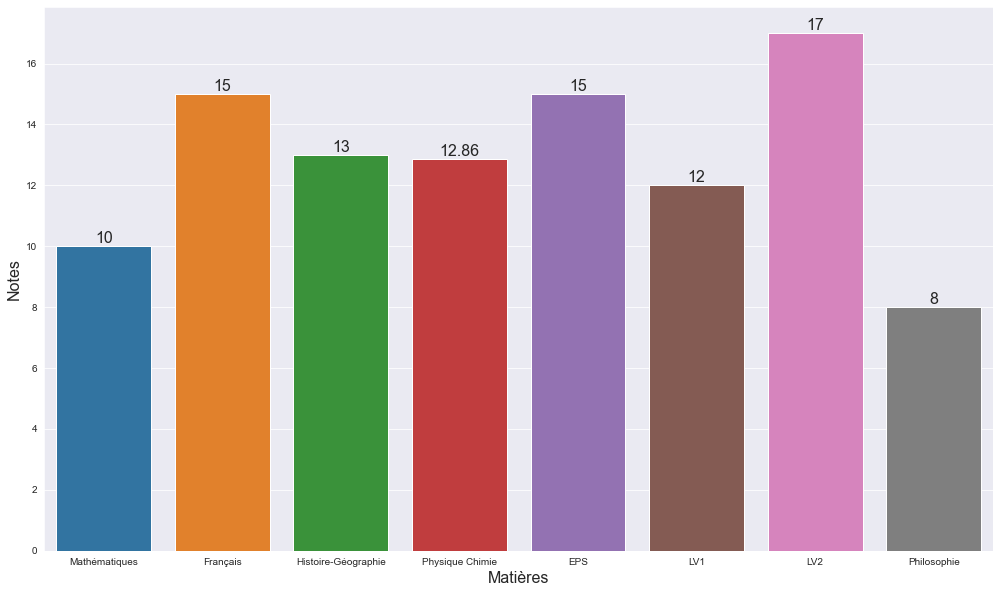

In [9]:
# Dernier point, il est très facile sur ce type de graphique de mettre la valeur sur chaque barre.
# Regardez le code suivant :

plt.figure(figsize=(17, 10))
ax = sns.barplot(x = "matières", y = "notes", data = bulletin_de_notes_df)
# Avec cette ligne la magie opère
ax.bar_label(ax.containers[0], label_type='edge', fontsize=16)
plt.ylabel(
    "Notes", 
    fontsize=16
)
plt.xlabel(
    "Matières", 
    fontsize=16
)
plt.show()

# Diagramme circulaire ou camenbert (pie chart)

Subtituable au digramme en bâtons, le diagramme circulaire nous permet d'afficher un **petit nombre de catégories**. Dans le cas précédent, notre nombre de données est assez conséquent. Par ailleurs, pour être suffisamment lisible, chaque portion doit avoir une certaine taille, bien évidemment une légende est préférable pour être plus compréhensible.

A choisir entre le diagramme circulaire et le diagramme en bâtons préférez le second, moins élégant certes, mais beaucoup plus lisible. Cette fois-ci, nous allons utiliser matplotlib et non seaborn.

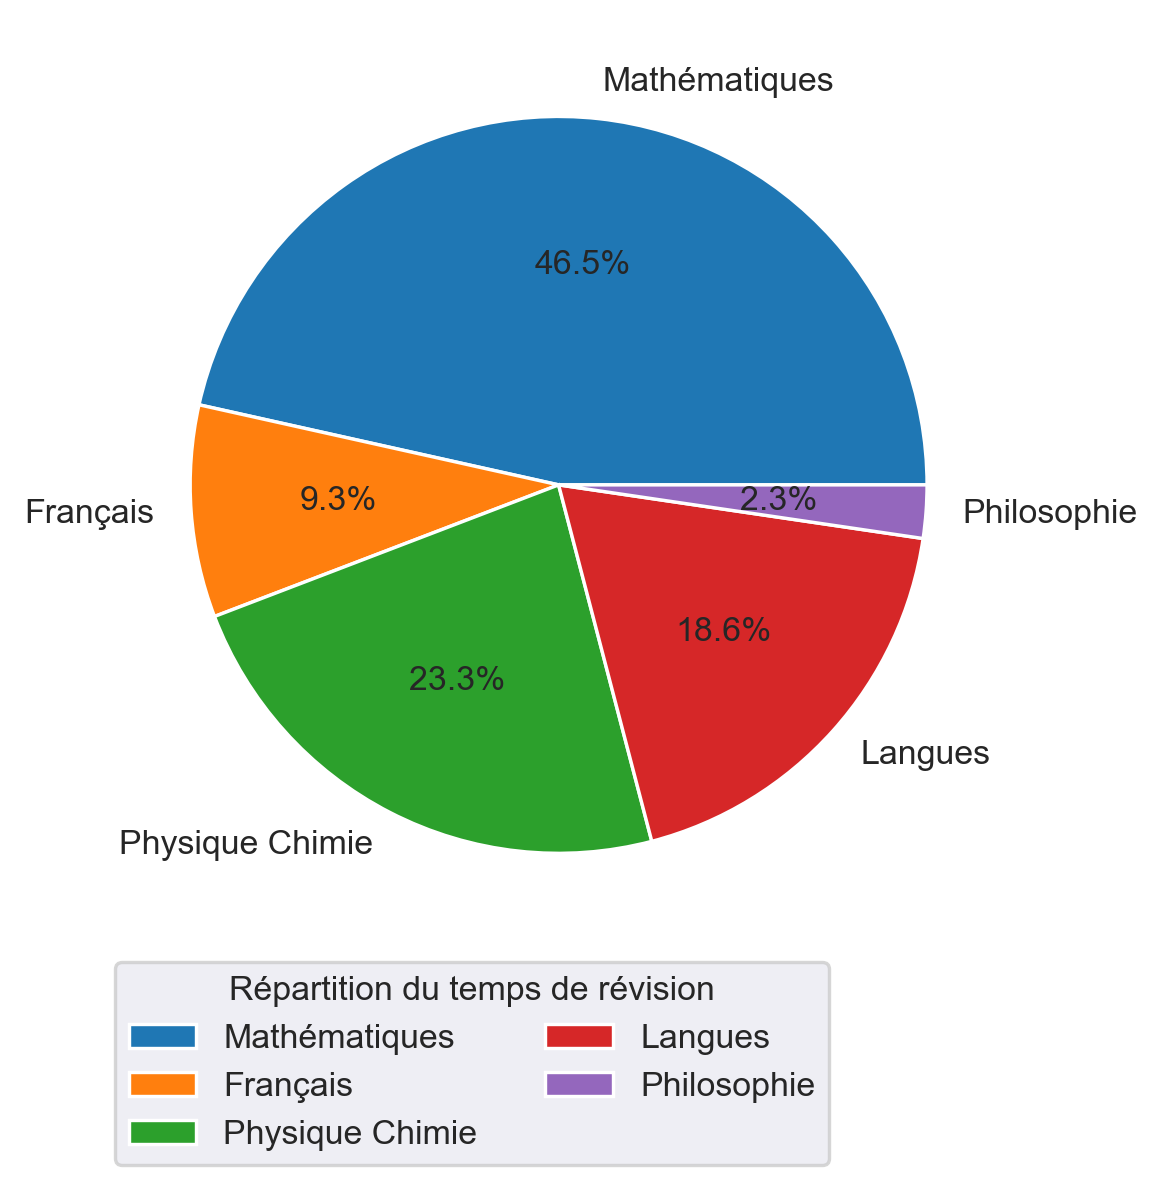

In [48]:
temps_revisions_df = pd.DataFrame.from_dict({
    "matieres": ["Mathématiques", "Français", "Physique Chimie", "Langues", "Philosophie"],
    "temps": [10, 2, 5, 4, .5],
})

plt.figure(figsize=(5, 5), dpi=244)
plt.pie(
    # On définit notre colonne (Serie) contenant nos valeurs numériques
    x = temps_revisions_df['temps'], 
    # On définit le format d'affichage des données 
    # En absence de ce paramètre, notre diagramme n'aura pas de valeur afichée
    # Il sera donc difficielement compréhensible
    autopct = "%.1f%%", 
    # On définit nos labels
    labels = temps_revisions_df['matieres']
)
# On ajoute une légende pour que ça soit encore plus clair
plt.legend(
    # Définit le titre de la légende et la position
    title='Répartition du temps de révision', 
    loc='upper left',
    # Définit le nombre de colonnes et le décalage de position
    ncol=2,
    bbox_to_anchor=(0, 0)
)
# - Documentation : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

N'oubliez pas de sauvegarder sous forme de image vos graphiques, ça peut être utile pour illustrer vos articles. Il faut utiliser la commande `fig.savefig()`, regardez la première partie du TP pour plus d'informations.

Bien, nous avons fait un diagramme en bâtons pour afficher les données de notre bulletin de notes et un autre pour montrer la répartition du temps, ça pourrait être intéressant de les mettre côte à côte. On pourrait effectivement sauvegarder les images puis les fusionner dans un logiciel comme Photoshop, mais nous allons être plus malins et utiliser, encore une fois, matplotlib et découvrir les `subplots`.

## Vues multiples / subplots

La méthode `subplots`, permet de définir une grille de vues, et ensuite d'ajouter nos graphiques. Par exemple :
```python
fig, liste_axes = plt.subplots(nrows = 2, ncols = 3, figsize=(40, 8), dpi=144)
```
- [Documentation de la méthode subplots](https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=subplots#matplotlib.pyplot.subplots)

Dans le code ci-dessus, nous avons défini une grille de deux lignes (`nrows`) et trois colonnes (`ncols`), si on schématise avec un tableau, ça donne quelque chose comme ceci.

| graphique1 | graphique2 | graphique3 |
|------------|------------|------------|
| graphique4 | graphique5 | graphique6 |

Mais pour notre exemple, nous allons définir une colonne de deux lignes (`nrows = 2, ncols = 1`), ou une ligne de deux colonnes (`nrows = 1, ncols = 2`), à vous de voir.

On remarque également que `subplots()` retourne deux valeurs :
- fig, un objet de la classe Figure. Nous l'avons déjà vu auparavant
- liste_axes, un tableau de deux dimensions (sauf si c'est grille avec une seule ligne) d'instance de l'objet AxesSubplot

Si on affiche le contenu de liste_axes (avec les paramètres ci-dessus), on obtient quelques chose comme ceci :
```python
array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)
```

Essayons tout ça.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

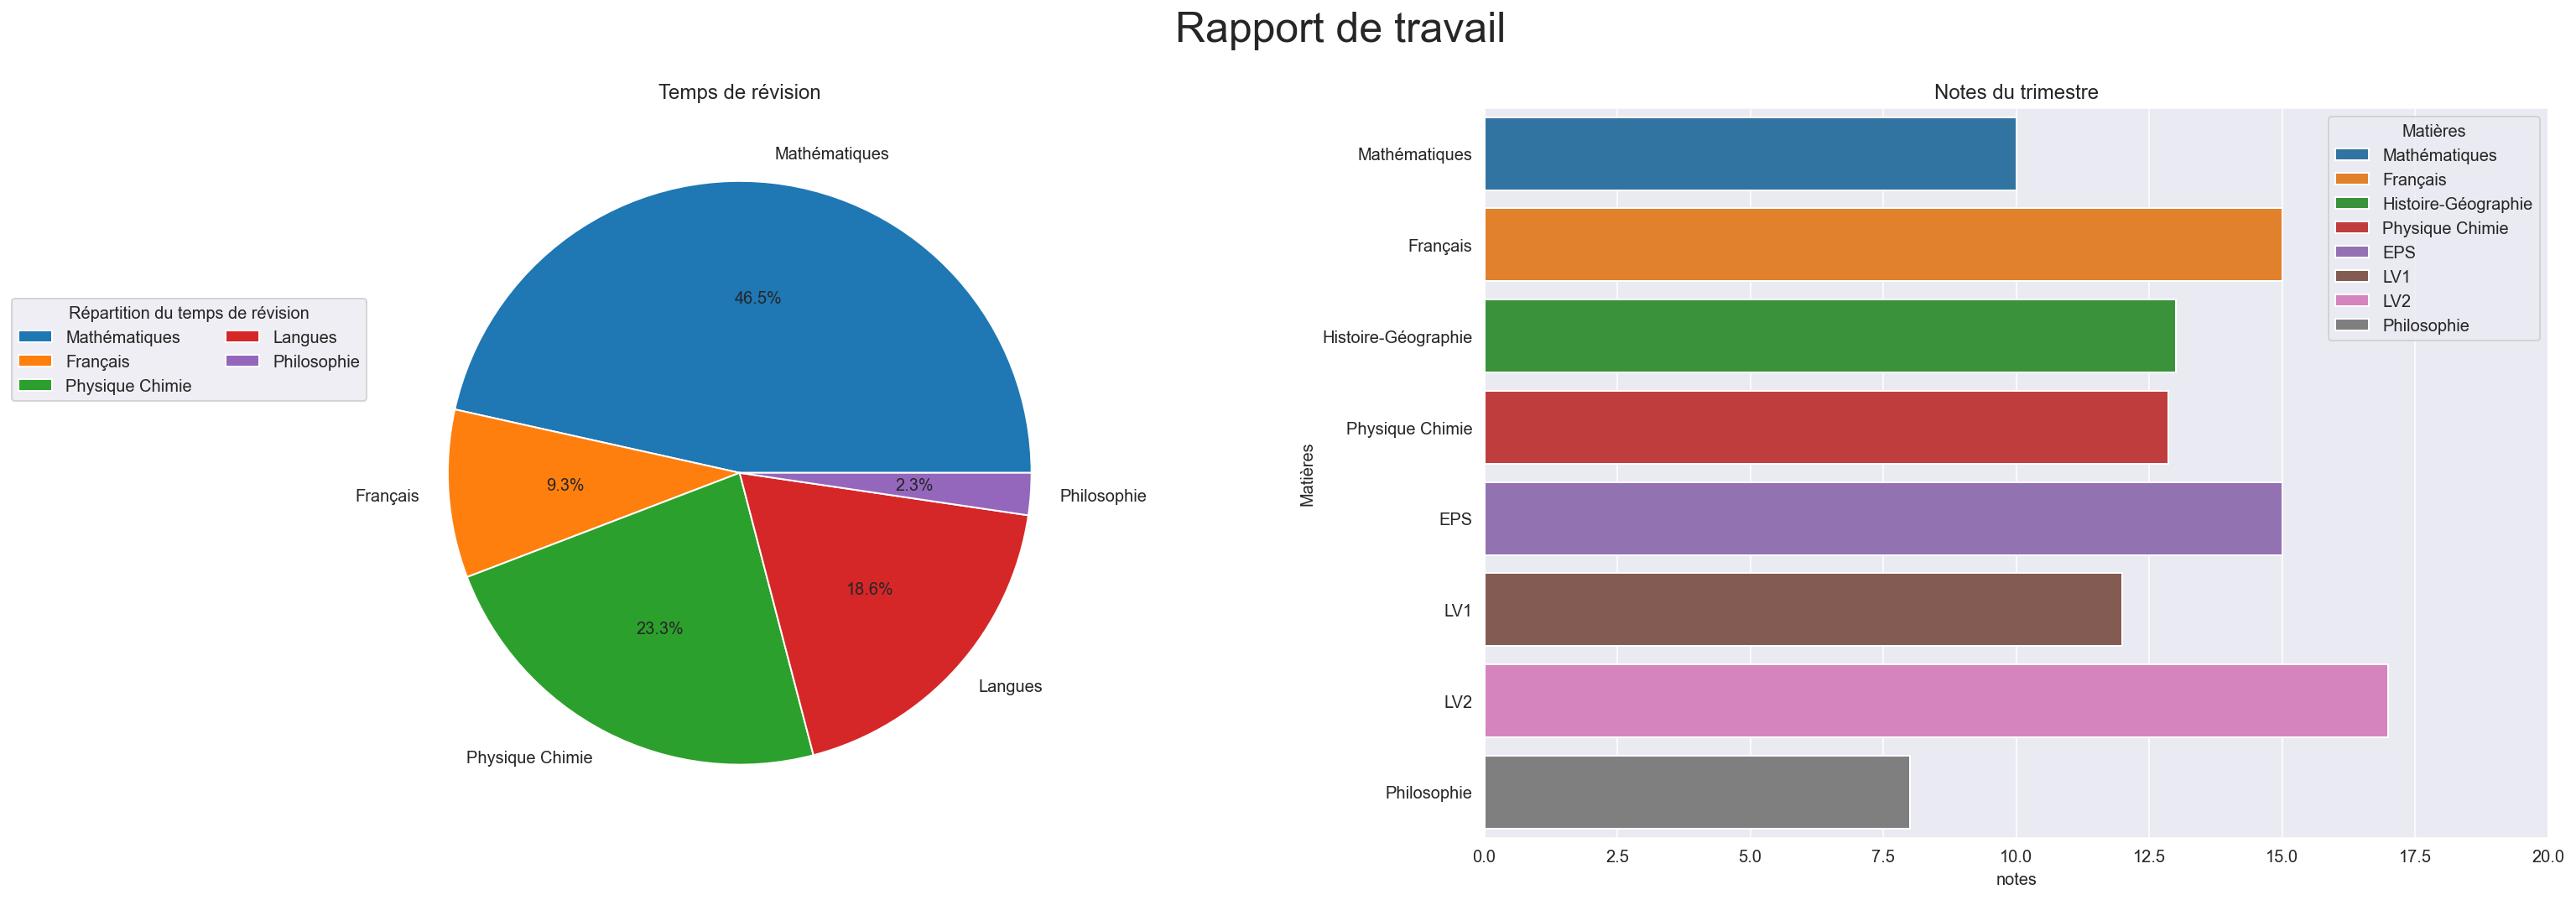

In [149]:
# Mettez les valeurs que nous souhaitez pour votre grille
# Attention, si vous mettez plus d'une ligne, 
# le tableau deviendra un tableau à deux dimensions
fig, liste_axes = plt.subplots(nrows = 1, ncols = 2, figsize=(25, 8), dpi=144)
display(liste_axes)

liste_axes[0].pie(
    x=temps_revisions_df['temps'], 
    autopct="%.1f%%", 
    labels=temps_revisions_df['matieres']
)

liste_axes[0].legend(
    title='Répartition du temps de révision', 
    loc='upper right',
    ncol=2,
    bbox_to_anchor=(0, .75)
)
liste_axes[0].set_title('Temps de révision')

sns.barplot(y = "matières", x = "notes", data=bulletin_de_notes_df, 
    # Avec seaborn, on utilise la propriété "ax" 
    # pour indiquer où est-ce qu'on veut afficher notre graphique
    ax=liste_axes[1],
    # Les deux lignes suivantes permettent de forcer l'affichage correct
    # de la légende
    hue="matières",
    dodge=False
)
liste_axes[1].set_ylabel("Matières")
# On définit l'intervalle de valeur min/max de notre axe des abscisses
liste_axes[1].set_xlim(0, 20)
liste_axes[1].set_title('Notes du trimestre')
liste_axes[1].legend(title="Matières")

# titre de notre ensemble de graphiques
plt.suptitle('Rapport de travail', size=25)

plt.show()

On remarque plusieurs choses suite à notre ensemble de graphiques :
- On n'utilise plus fig/plt pour définir les caractéristiques de chaque graphique, mais le subplot associé à notre graphique
- Il faut préciser à un graphique généré par seaborn où est-ce qu'il doit s'afficher

Si vous sauvegardez le tout sous forme d'image, vous aurez, vos deux graphiques sur la même images.

- Note : Nous avons forcé l'emplacement des axes grâce à subplot. Il est possible de créer des axes qui vont "flotter" dans votre figure
- Note 2 : subplots est relativement limité, sa mise en page est très basique. Il existe GridSpec pour réaliser des grilles plus poussées. [Voir la documentation de GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)

# Nuage de points (scatter plot)

Le nuage de points est le graphique idéal pour mettre en évidence des corrélations (pas forcément des causalités), des valeurs aberrantes ou encore des tendances. Ce graphique conduit parfois au traçage d'une droite de régression comme ce que nous avions fait dans notre TP concernant la régression linéaire.

![](./_images/nuage-de-points.jpg)

- Source : [wikipedia](https://en.wikipedia.org/wiki/Scatter_plot)

Les données que nous avons utilisé plus haut, n'étant pas vraiment adaptée à ce type de graphiques, nous allons donc faire un nouveau jeu de données, mais toujours dans le thème scolaire. Nous allons définir un jeu de données concenant trois colonnes :
- temps de travail
- note obtenue
- section

Pour la matière ? À vous de voir. Ce qui nous intéresse c'est avant tout d'avoir un bon nombre données, disons alors que ça concerne un lycée tout entier.

Pour le nuage de points, seaborn et matplotlib font tous les deux l'affaire, nous allons néanmoins utiliser seaborn. Avant de faire notre graphique générons nos données.

In [6]:
# On utilise scipy qui possède une puissante bibliothèque de data-science pour gérer les calculs de statistiques
# Notre but ici est de générer des notes et des temps de révision aléatoire normalienne tronquée
# Ca va nous servir pour notre DataFrame
# On procède ainsi pour l'histogramme, et surtout avoir des données plus réalistes,
# plus représentatives d'une promotion scolaire
import scipy.stats as stats

nbr_eleves = 135
min_tps_revision, max_tps_revision = 0, 10 # tps de revision mix, max
mediane, ecart_type = 3, 2.5
# La méthode .truncnorm() permet de répartir les valeurs selon une loi normale tronquée
heures_travail_tmp = stats.truncnorm(
    (min_tps_revision - mediane) / ecart_type, (max_tps_revision - mediane) / ecart_type, loc=mediane, scale=ecart_type)

# Contient toutes les valeurs normalisées des temps de révision des élèves
nbr_heures_revisions = heures_travail_tmp.rvs(nbr_eleves)
delta = np.random.uniform(4, 8, nbr_heures_revisions.size)

# Contient toutes les valeurs normalisées des notes des élèves indexées sur :
# - Le temps de révision
# - Un coefficient de 1.15
# - Un delta aléatoire
liste_notes = 1.15 * nbr_heures_revisions + delta

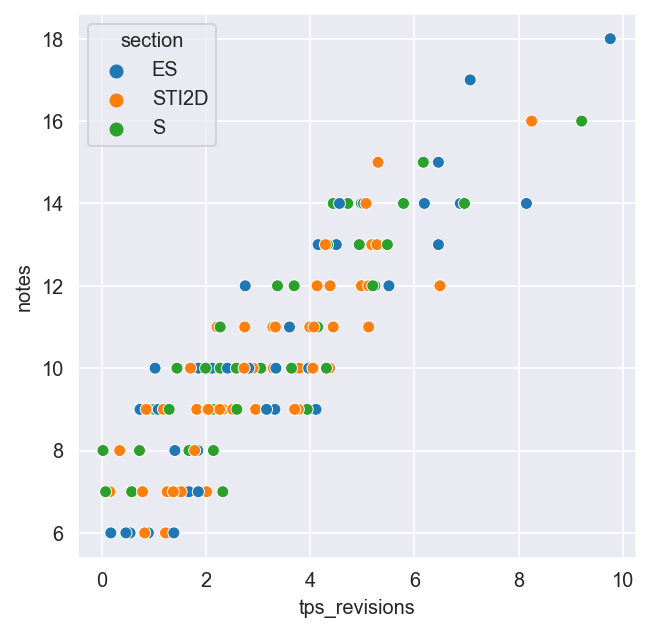

In [ ]:
liste_sections = ['STI2D', "ES", "S"]

donnees = {
    'tps_revisions': np.round(nbr_heures_revisions, 2), 
    'notes': np.ceil(liste_notes), 
    'section': np.random.choice(liste_sections, size=(nbr_heures_revisions.size))
}
heures_notes_df = pd.DataFrame(data=donnees)

plt.figure(figsize=(7, 7), dpi=144)
sns.scatterplot(data=heures_notes_df, x="tps_revisions", y="notes", hue="section")

plt.show()

Le graphique ci-dessus manque de données, rajoutez ce qui manque dans la cellule du dessus pour avoir un graphique compréhensible.

# Histogramme (histogram)

![nuage de points schéma](https://upload.wikimedia.org/wikipedia/commons/8/8e/Histogram_example.svg)

Souvent confondu, à tort, avec le diagramme en bâtons. L'histogramme montre la distribution d'une variable numérique. Généralement on retrouve en abscisse les variables numériques et en ordonnées la fréquence d'apparition de ces variables.

Pour éviter la confusion, on conseille souvent d'espacer les barres dans un diagramme en bâtons et coller les barres dans un histogramme, heureusement pour nous matplotlib applique déjà ce raisonnement. Par ailleurs, ceci ne dispense pas la présence de légendes pour rendre vos graphiques plus clairs.

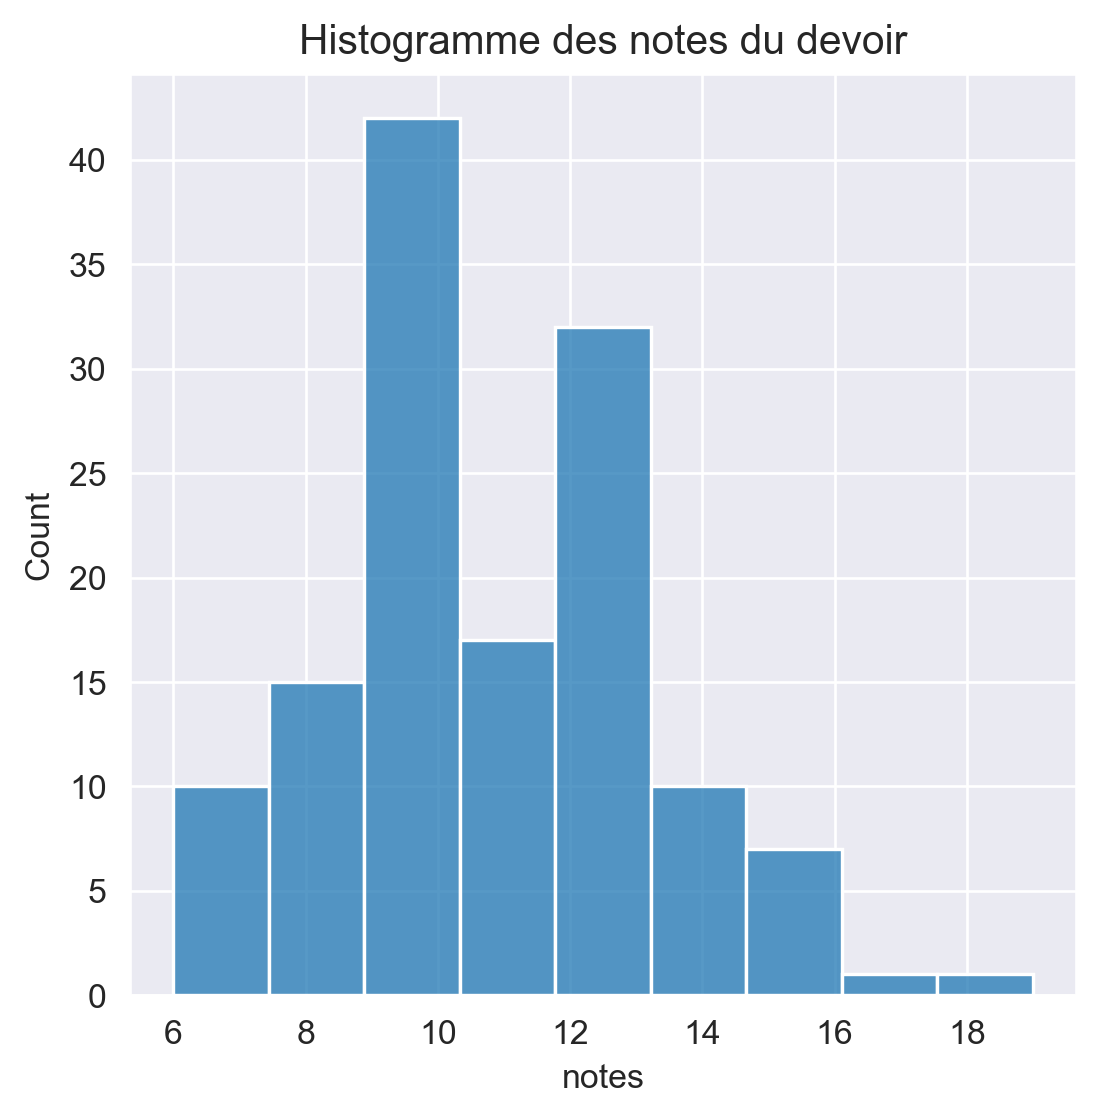

In [19]:
plt.figure(figsize=(5, 5), dpi=244)
# histplot n'accepte qu'une seule colonne vu que l'autre axe sera utilisé pour compter
# le nombre d'occurences de la colonne.
# Si on souhaite que notre histogramme soit horizontal, il suffira de remplacer 
sns.histplot(
    data=heures_notes_df, 
    x="notes",
    # kde représente l'Estimation par noyau
    # https://fr.wikipedia.org/wiki/Estimation_par_noyau
    # Nous pourrions également rajouter l'attribut "hue" avec la valeur "section"
    # Pour voir les différences entre chaque section
    kde=False
)
plt.title('Histogramme des notes du devoir')

plt.show()

Voilà, nous avons terminé la decouverte de matplotlib et seaborn. Maintenant à vous de jouer, vous pouvez reprendre le jeu de données des prénoms pour afficher des graphiques. Exemple : l'évolution d'un prénom ou encore les prénoms les plus donnés sur une année précises. Les possibilités sont infinies.